# Final Project Submission

Please fill out:
* Student name: Anila Qureshi, Marwan Kalo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

## What data are we dealing with?

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns

### Import Dataset and Inspect

In [2]:
df = pd.read_csv('./raw_data/kc_house_data.csv')
print(df.shape)
print(df.keys())
df.head()

(21597, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Cleaning Data

In [3]:
# Dropping null (NaN) values 
df = df.dropna()
print(df.shape)
df

(15762, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [4]:
# Dropping values containing '?' in sqft_basement column
df = df[df.sqft_basement != '?']
print(df.shape)
df

(15429, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [5]:
# Converting float values to integers for efficient future manipulation
df['price'] = (df['price']).astype(int)
df['floors'] = (df['floors']).astype(int)
df['sqft_basement'] = (df['sqft_basement']).astype(float).astype(int)
df['view'] = (df['view']).astype(int)
df['waterfront'] = (df['waterfront']).astype(int)

df.head()

/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is tryin

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1,0,0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113


In [6]:
# Number of houses sold more than once - 83
df_duplicates = df[df.duplicated(['id'])]
df_duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000,3,1.50,1580,5000,1,0,0,...,8,1290,290,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000,4,3.25,4290,12103,1,0,3,...,11,2690,1600,1997,0.0,98006,47.5503,-122.102,3860,11244
718,8820903380,1/2/2015,730000,6,2.25,2660,13579,2,0,0,...,7,2660,0,1937,1990.0,98125,47.7142,-122.286,1120,8242
837,8682262400,5/13/2015,419950,2,1.75,1350,4003,1,0,0,...,8,1350,0,2004,0.0,98053,47.7176,-122.033,1350,4479
1085,9834200885,4/20/2015,550000,4,2.50,2080,4080,1,0,0,...,7,1040,1040,1962,0.0,98144,47.5720,-122.290,1340,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,7856400300,3/22/2015,1510000,2,2.50,3180,9400,2,0,4,...,10,2610,570,1985,0.0,98006,47.5617,-122.158,3760,9450
19537,643300040,3/13/2015,719521,4,1.75,1920,9500,1,0,0,...,7,1470,450,1966,0.0,98006,47.5683,-122.177,1820,10091
20038,8648900110,8/26/2014,555000,3,2.50,1940,3211,2,0,0,...,8,1940,0,2009,0.0,98027,47.5644,-122.093,1880,3078
20165,7853400250,2/19/2015,645000,4,3.50,2910,5260,2,0,0,...,9,2910,0,2012,0.0,98065,47.5168,-121.883,2910,5260


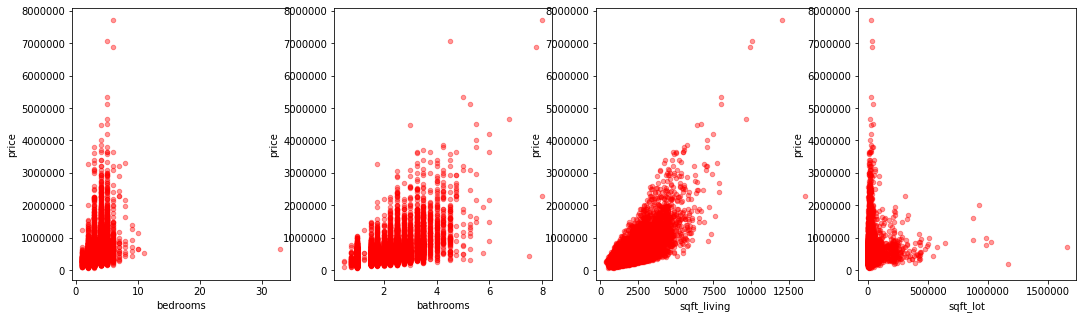

In [7]:
# To help identify categorical variables, we create subplots of the features against price:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,5))

for xcol, ax in zip(df[['bedrooms','bathrooms','sqft_living','sqft_lot']], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

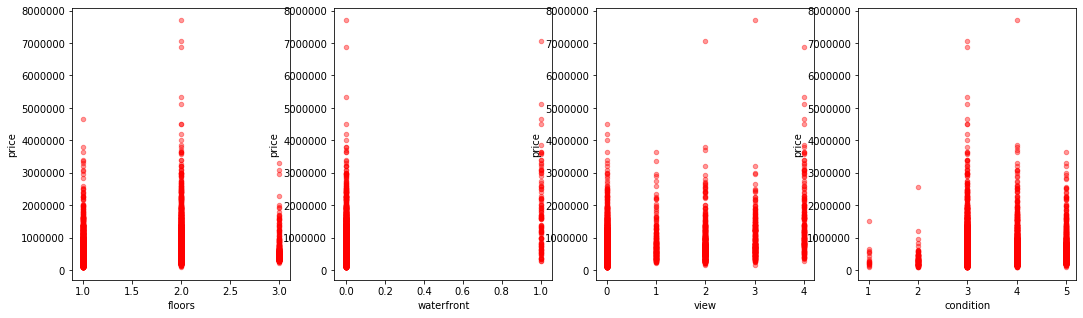

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,5))

for xcol, ax in zip(df[['floors','waterfront','view','condition']], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

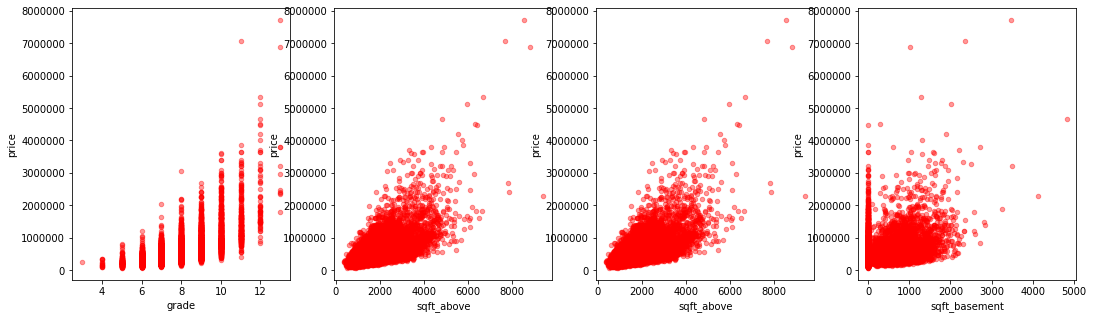

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,5))

for xcol, ax in zip(df[['grade','sqft_above','sqft_above','sqft_basement']], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

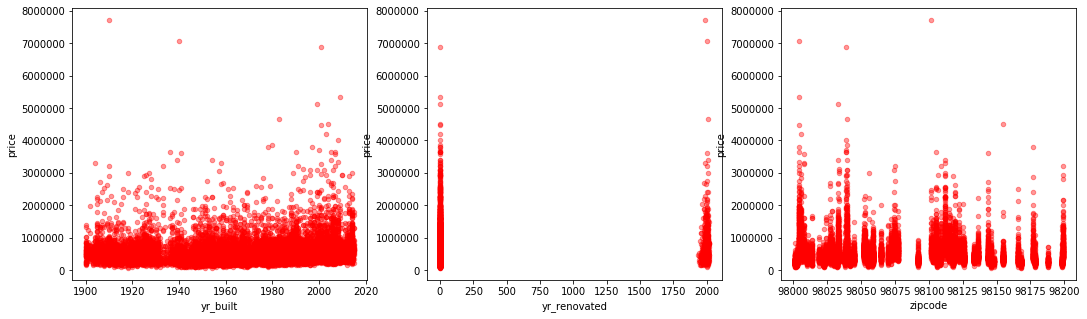

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for xcol, ax in zip(df[['yr_built', 'yr_renovated', 'zipcode',]], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

In [11]:
# Identifying the categorical features in our dataset and their unique values which we can then encode
print(np.sort(df['condition'].unique()))
print(np.sort(df['bedrooms'].unique()))
print(np.sort(df['bathrooms'].unique()))
print(np.sort(df['floors'].unique()))
print(np.sort(df['waterfront'].unique()))
print(np.sort(df['view'].unique()))
print(np.sort(df['grade'].unique()))

[1 2 3 4 5]
[ 1  2  3  4  5  6  7  8  9 10 11 33]
[0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.75 7.5  7.75 8.  ]
[1 2 3]
[0 1]
[0 1 2 3 4]
[ 3  4  5  6  7  8  9 10 11 12 13]


In [12]:
# Assigning dummy variables to categorical features
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True, dtype=float)
floor_dummies = pd.get_dummies(df['floors'], prefix='floor', drop_first=True, dtype=float)
wtrfrnt_dummies = pd.get_dummies(df['waterfront'], prefix='wtrfrnt', drop_first=True, dtype=float)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True, dtype=float)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True, dtype=float)

In [13]:
# Creating a new dataframe to be used for the linear regression with dummy variables
df_dummy = df.drop(['condition', 'floors', 'waterfront', 'view', 'grade'], axis=1)

In [14]:
df_dummy = pd.concat([df_dummy, cond_dummies, floor_dummies, wtrfrnt_dummies, view_dummies, grade_dummies], axis=1)

In [15]:
df_dummy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2170,400,1951,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1050,910,1965,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1680,0,1987,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,3890,1530,2001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1050,730,1960,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now that we have cleaned, let's check some descriptive statistics - How is the data distributed?

In [16]:
print("Median House Sale Price: $",df['price'].median())

Median House Sale Price: $ 450000.0


In [17]:
print("Mean House Sale Price: $",round(df['price'].mean(),2))

Mean House Sale Price: $ 541497.78


In [18]:
df['price'].describe()

count    1.542900e+04
mean     5.414978e+05
std      3.730219e+05
min      8.200000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.435000e+05
max      7.700000e+06
Name: price, dtype: float64

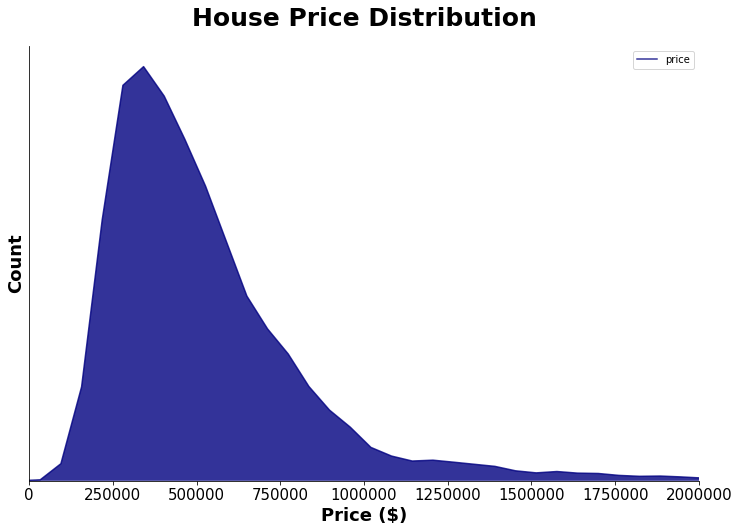

In [19]:
# How are house prices distributed in King County? How are they distributed geographically?
# A histogram showing distribution of price (capped at $2 mil for a more accurate visualisation)
fig, ax = plt.subplots(figsize=(12,8))

sns.kdeplot(df['price'], shade=True, color='navy',alpha=0.8)
sns.despine()

plt.yticks([])
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_title('House Price Distribution', fontsize=25, loc='center', weight='bold', pad=20)
ax.set_xlabel('Price ($)', fontsize=18, weight='bold')
ax.set_ylabel('Count', fontsize=18, weight='bold')

plt.xlim(0,2000000)
plt.show()

In [20]:
# Preparing the data for a heatmap visualisation of house price sales across King County
# This will give us an overview of the distribution of price across the geography in question

price = df['price'].tolist()
latitude = df['lat'].tolist()
longitude = df['long'].tolist()

price_multiple = []
for x in price:
    price_multiple.append(x/100000)

In [21]:
price_multiple

[5.38,
 6.04,
 5.1,
 12.3,
 2.295,
 3.23,
 4.68,
 4.0,
 5.3,
 6.5,
 3.95,
 4.85,
 2.3,
 3.85,
 20.0,
 2.85,
 3.29,
 2.33,
 6.67,
 7.19,
 5.805,
 2.8,
 6.875,
 5.35,
 3.225,
 6.96,
 5.5,
 6.4,
 2.4,
 6.05,
 7.75,
 6.85,
 3.09,
 2.1049,
 7.85,
 4.5,
 13.5,
 2.28,
 3.45,
 5.85,
 9.2,
 3.01,
 4.3,
 2.89,
 5.49,
 4.25,
 3.17625,
 2.87,
 13.3,
 10.4,
 3.25,
 5.71,
 3.49,
 8.325,
 4.1,
 3.9,
 3.6,
 3.55,
 3.56,
 3.15,
 9.4,
 3.05,
 2.435,
 11.0,
 1.53,
 4.3,
 7.0,
 9.05,
 2.475,
 1.99,
 3.14,
 4.375,
 8.5083,
 5.55,
 6.9995,
 10.9,
 2.9,
 4.6,
 1.885,
 6.8,
 4.7,
 5.7,
 3.2995,
 5.185,
 2.05425,
 5.35,
 6.6,
 3.95,
 7.7,
 14.5,
 2.12,
 6.605,
 7.84,
 4.53246,
 6.75,
 2.2,
 3.825,
 6.65,
 2.05,
 5.0,
 9.215,
 8.9,
 4.3,
 2.58,
 5.11,
 5.3217,
 5.6,
 22.5,
 3.5,
 2.15,
 6.5,
 3.2,
 2.47,
 3.2,
 2.55,
 4.38,
 9.0,
 4.41,
 4.2,
 3.7,
 2.6995,
 8.071,
 6.53,
 2.84,
 9.175,
 6.73,
 4.25,
 3.9995,
 2.6995,
 2.6,
 4.7,
 1.635,
 8.35,
 11.0,
 2.69,
 5.85188,
 1.6695,
 7.99,
 4.0,
 2.3,
 2.56883,
 4.23

In [22]:
coords_and_weights = zip(latitude, longitude, price_multiple)

In [23]:
# An interactive sale price heatmap
heat_map = folium.Map([47.477993, -122.206452],
                     zoom_start = 11.5)
heat_map
HeatMap(coords_and_weights,radius=15).add_to(heat_map)
heat_map

## A closer look at our feature variables

### Distributions 

In [24]:
print(df.keys())
df.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1,0,0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113


In [25]:
# Create a dataframe dropping certain features to then plot histograms showing distribution of features
df_dist = df.drop(['id','zipcode', 'lat', 'long'], axis=1)

/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


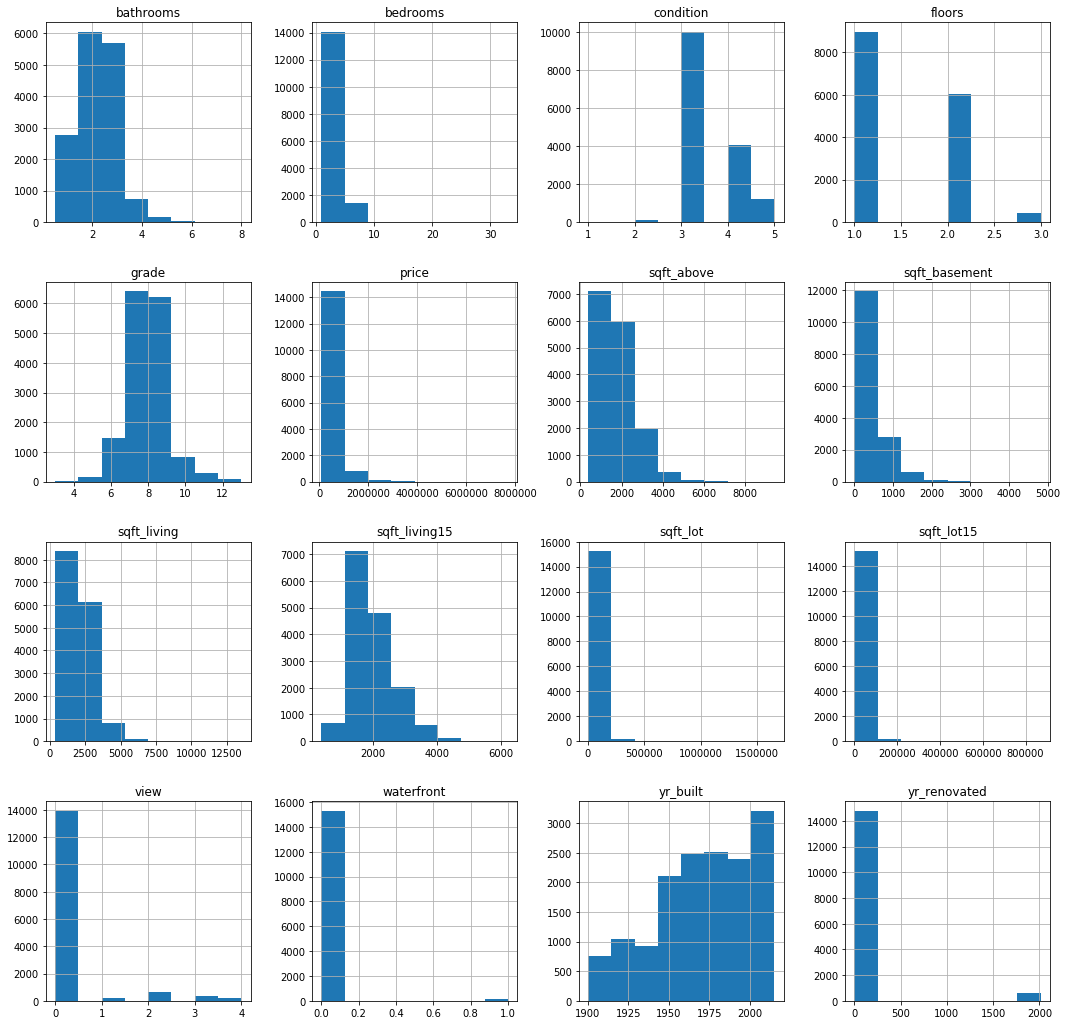

In [26]:
# Distribution of features
fig = plt.figure(figsize = (18,18))
ax = fig.gca()
df_dist.hist(ax = ax, bins=8)
plt.show()

In [27]:
# What were the top five zipcodes with the largest volume of sales within our data?
df.zipcode.value_counts().head()

98038    425
98103    415
98052    410
98042    408
98117    394
Name: zipcode, dtype: int64

### Multicollinearity

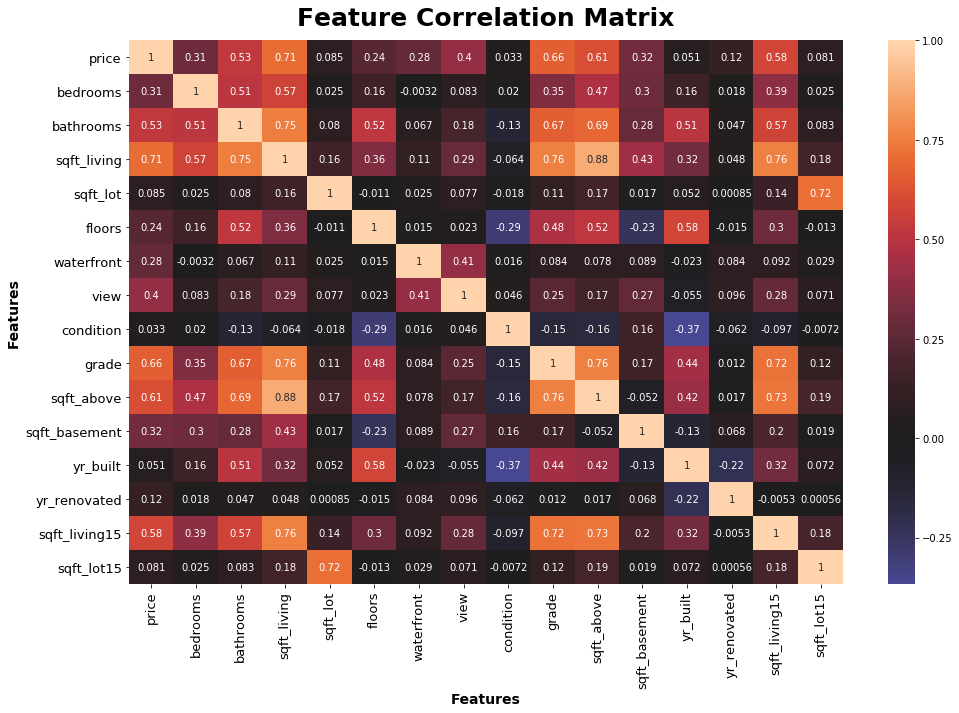

In [28]:
# Choosing features to check for multicollinearity 
df_multicoll = df.drop(['date','id','zipcode', 'lat', 'long'], axis=1)

fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df_multicoll.corr(), center=0, annot=True)

ax.set_title('Feature Correlation Matrix', fontsize=25, loc='center', weight='bold', pad=15)
ax.set_xlabel('Features', fontsize=14, weight='bold')
ax.set_ylabel('Features', fontsize=14, weight='bold')
ax.tick_params(axis='both', which='major', labelsize=13)

plt.autoscale()
plt.show()

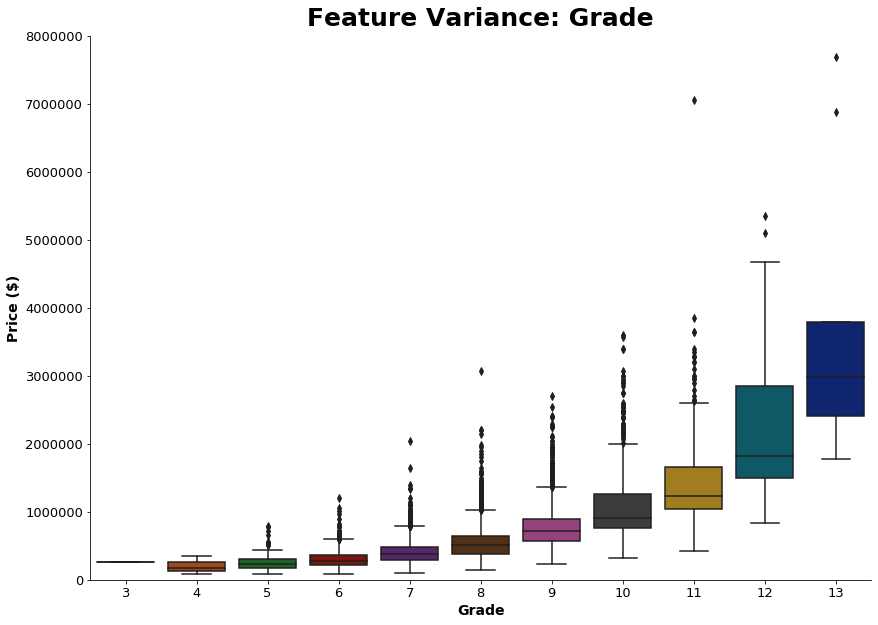

In [29]:
# A boxplot showing the variance of the grade feature as it increases (heteroscedacity) - need to watch out 
# in later steps

var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)

f, ax = plt.subplots(figsize=(14, 10))
fig = sns.boxplot(x=var, y = 'price', data=data, palette='dark')

ax.set_title('Feature Variance: Grade', fontsize=25, loc='center', weight='bold', pad=10)
ax.set_xlabel('Grade', fontsize=14, weight='bold')
ax.set_ylabel('Price ($)', fontsize=14, weight='bold')
ax.tick_params(axis='both', which='major', labelsize=13)

sns.despine()
fig.axis(ymin=0, ymax=8000000);

## Modelling the data

### Baseline Model

In [30]:
# Import the necessary software package
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression

In [31]:
df_dummy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2170,400,1951,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1050,910,1965,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1680,0,1987,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,3890,1530,2001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1050,730,1960,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_dummy_new = df_dummy.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)

In [33]:
# X variables will contain our continuous and discrete features - we drop the dependent as well as non-predictors
X_base = df_dummy_new.drop(['price'], axis=1)

# Y variable is the dependent variable - what we want to predict
Y_base = df_dummy[['price']]

In [34]:
# Creating train test split (80/20 split)
X_train_original, X_test_original, Y_train_original, Y_test_original = train_test_split(X_base,Y_base,test_size=.2, random_state=40)
X_train = X_train_original.copy()
X_test = X_test_original.copy()
Y_train = Y_train_original.copy()
Y_test = Y_test_original.copy()

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12343, 31)
(3086, 31)
(12343, 1)
(3086, 1)


In [35]:
# Statsmodels OLS for training set
# Adding of constant to fit both the slope and intercept 
X_train_const = sm.add_constant(X_train)
base_training_model = sm.OLS(Y_train, X_train_const);

/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
training_results = base_training_model.fit()

In [37]:
print("Training Data R-Squared:",round(training_results.rsquared,3))
training_results.summary()

Training Data R-Squared: 0.688


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     904.6
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:42:44   Log-Likelihood:            -1.6863e+05
No. Observations:               12343   AIC:                         3.373e+05
Df Residuals:                   12312   BIC:                         3.376e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.383e+06   2.83e+05     22.586      0.000    5.83e+06    6.94e+06
bedrooms      -2.548e+04   2560.885     -9.949      0.000   -3.05e+04   -2.05e+04
bathrooms      5.031e+04   4462.815     11.273      0.000    4.16e+04    5.91e+04
sqft_living      97.1631      3.159     30.755      0.000      90.971     103.356
sqft_lot         -0.0145      0.062     -0.234      0.815      -0.136       0.107
sqft_above       43.5522      3.151     13.823      0.000      37.377      49.728
sqft_basement    53.6109      3.529     15.193      0.000      46.694      60.528
yr_built      -3274.3281     95.612    -34.246      0.000   -3461.742   -3086.914
yr_renovated     19.7978      5.091      3.889      0.000       9.818      29.778
sqft_living15    27.0902      4.652      5.823      0.000      17.971      36.210
sqft_lot15       -0.4743      0.099     -4.798      0.000      -0.668      -0.281
cond_2        -2.916e+04   5.93e+04     -0.492      0.623   -1.45e+05    8.71e+04
cond_3        -4452.9554   5.61e+04     -0.079      0.937   -1.14e+05    1.06e+05
cond_4         9185.0030   5.61e+04      0.164      0.870   -1.01e+05    1.19e+05
cond_5         4.971e+04   5.64e+04      0.881      0.378   -6.09e+04     1.6e+05
floor_2         1.22e+04   5899.035      2.068      0.039     637.057    2.38e+04
floor_3        1.449e+05   1.28e+04     11.305      0.000     1.2e+05     1.7e+05
wtrfrnt_1      5.972e+05   2.69e+04     22.187      0.000    5.44e+05     6.5e+05
view_1         1.156e+05    1.5e+04      7.704      0.000    8.62e+04    1.45e+05
view_2         5.296e+04   9457.184      5.600      0.000    3.44e+04    7.15e+04
view_3         8.894e+04   1.31e+04      6.773      0.000    6.32e+04    1.15e+05
view_4         1.827e+05   1.96e+04      9.311      0.000    1.44e+05    2.21e+05
grade_4        3.946e+04   2.16e+05      0.183      0.855   -3.84e+05    4.63e+05
grade_5        1.187e+04   2.09e+05      0.057      0.955   -3.97e+05    4.21e+05
grade_6        6.932e+04   2.08e+05      0.333      0.739   -3.38e+05    4.77e+05
grade_7        1.417e+05   2.08e+05      0.681      0.496   -2.66e+05    5.49e+05
grade_8        2.207e+05   2.08e+05      1.061      0.289   -1.87e+05    6.29e+05
grade_9        3.547e+05   2.08e+05      1.704      0.088   -5.34e+04    7.63e+05
grade_10       5.261e+05   2.08e+05      2.525      0.012    1.18e+05    9.35e+05
grade_11       7.359e+05   2.09e+05      3.523      0.000    3.26e+05    1.15e+06
grade_12       1.323e+06   2.11e+05      6.284      0.000     9.1e+05    1.74e+06
grade_13       2.184e+06    2.2e+05      9.910      0.000    1.75e+06    2.62e+06
==============================================================================
Omnibus:                     7629.958   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB

In [38]:
# Our baseline model, using all appropriate features, returned an R-Squared value of 0.688 on our training data.
# Let's see if we can improve

### Assessing and refining the model

In [39]:
# Based on the p-values in the summary table, we can see that many extraneous features exist
# therefore we want to select only the features whose p-values are less than 0.05.

In [40]:
# Discarding features with p-values less than 0.05
base_summary = training_results.summary()
base_p_table = base_summary.tables[1]
base_p_table = pd.DataFrame(base_p_table.data)
base_p_table.columns = base_p_table.iloc[0]
base_p_table = base_p_table.drop(0)
base_p_table = base_p_table.set_index(base_p_table.columns[0])

base_p_table['P>|t|'] = base_p_table['P>|t|'].astype(float)
x_cols = list(base_p_table[base_p_table['P>|t|'] < 0.05].index)
x_cols.remove('const')
print(len(base_p_table), len(x_cols))
print(x_cols)

32 20
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'floor_2', 'floor_3', 'wtrfrnt_1', 'view_1', 'view_2', 'view_3', 'view_4', 'grade_10', 'grade_11', 'grade_12', 'grade_13']


In [41]:
# Refit with new subset features
X_train = X_train[x_cols]
Y_train = Y_train[['price']]

In [42]:
X_train_const = sm.add_constant(X_train)
base_training_model = sm.OLS(Y_train, X_train_const)

In [43]:
results1 = base_training_model.fit()

In [44]:
# Our training data accuracy dropped to an R-squared of 0.665 when taking only the significant features
print("Training Data R-Squared:",round(results1.rsquared,3))
results1.summary()

Training Data R-Squared: 0.665


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1289.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:42:44   Log-Likelihood:            -1.6906e+05
No. Observations:               12343   AIC:                         3.382e+05
Df Residuals:                   12323   BIC:                         3.383e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.002e+06   1.78e+05     33.703      0.000    5.65e+06    6.35e+06
bedrooms      -3.133e+04   2624.542    -11.939      0.000   -3.65e+04   -2.62e+04
bathrooms      6.225e+04   4561.900     13.645      0.000    5.33e+04    7.12e+04
sqft_living     121.1072      3.157     38.360      0.000     114.919     127.296
sqft_above       60.6925      3.176     19.108      0.000      54.467      66.918
sqft_basement    60.4147      3.630     16.643      0.000      53.299      67.530
yr_built      -3064.7419     91.939    -33.334      0.000   -3244.957   -2884.527
yr_renovated     20.0773      5.181      3.875      0.000       9.922      30.233
sqft_living15    62.5642      4.615     13.558      0.000      53.519      71.610
sqft_lot15       -0.5863      0.073     -7.980      0.000      -0.730      -0.442
floor_2        2.917e+04   5996.645      4.865      0.000    1.74e+04    4.09e+04
floor_3        1.941e+05    1.3e+04     14.888      0.000    1.69e+05     2.2e+05
wtrfrnt_1      5.571e+05   2.78e+04     20.027      0.000    5.03e+05    6.12e+05
view_1         1.232e+05   1.55e+04      7.939      0.000    9.28e+04    1.54e+05
view_2         6.984e+04   9762.648      7.154      0.000    5.07e+04     8.9e+04
view_3         1.078e+05   1.35e+04      7.953      0.000    8.12e+04    1.34e+05
view_4         2.163e+05   2.03e+04     10.671      0.000    1.77e+05    2.56e+05
grade_10       2.127e+05   9779.640     21.752      0.000    1.94e+05    2.32e+05
grade_11       3.565e+05   1.66e+04     21.537      0.000    3.24e+05    3.89e+05
grade_12       8.864e+05   3.09e+04     28.689      0.000    8.26e+05    9.47e+05
grade_13       1.675e+06   7.35e+04     22.773      0.000    1.53e+06    1.82e+06
==============================================================================
Omnibus:                     6586.758   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216968.737
Skew:                           1.962   Prob(JB):                         0.00
Kurtosis:                      23.161   Cond. No.                     1.37e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.97e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Check for Multicollinearity

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Here we perform the variance inflation factor test to identify features that display multicollinearity
X = df_dummy[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('bedrooms', 23.253938056727044),
 ('bathrooms', 25.905865535306273),
 ('sqft_living', inf),
 ('sqft_above', inf),
 ('sqft_basement', inf),
 ('yr_built', 22.933564446555174),
 ('yr_renovated', 1.0646587153210307),
 ('sqft_living15', 24.93359668046406),
 ('sqft_lot15', 1.301258044766863),
 ('floor_2', 3.3906890371978977),
 ('floor_3', 1.1927546121595802),
 ('wtrfrnt_1', 1.5795476460969278),
 ('view_1', 1.0394704319797026),
 ('view_2', 1.0978524904996825),
 ('view_3', 1.0939759937490456),
 ('view_4', 1.6600400904355448),
 ('grade_10', 1.3802481898092493),
 ('grade_11', 1.297238400109052),
 ('grade_12', 1.150077706765887),
 ('grade_13', 1.0564393743767895)]

In [47]:
# We drop any features that display a vif of greater than 10, these features display too much collinearity
# These features are yr_built and sqft_living15

In [48]:
x_cols.remove('yr_built')

In [49]:
x_cols.remove('sqft_living')

In [50]:
x_cols.remove('bedrooms')

In [51]:
x_cols.remove('bathrooms')

In [52]:
x_cols

['sqft_above',
 'sqft_basement',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15',
 'floor_2',
 'floor_3',
 'wtrfrnt_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13']

In [53]:
# Refit with subset features
X_train = X_train[x_cols]
Y_train = Y_train[['price']]

In [54]:
X_train_const = sm.add_constant(X_train)
base_training_model = sm.OLS(Y_train, X_train_const);

In [55]:
results2 = base_training_model.fit()

In [84]:
# Our model achieves an R-squared of 0.63, a slight hit on accuracy however we have now removed features that are 
# highly correlated with one another.
print("Training Data R-Squared:",round(results2.rsquared,3))
results2.summary()

Training Data R-Squared: 0.633


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1327.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:45:05   Log-Likelihood:            -1.6964e+05
No. Observations:               12343   AIC:                         3.393e+05
Df Residuals:                   12326   BIC:                         3.394e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.541e+04   7317.791      4.839      0.000    2.11e+04    4.98e+04
sqft_above      177.5283      4.629     38.352      0.000     168.455     186.602
sqft_basement   194.3854      5.201     37.375      0.000     184.191     204.580
yr_renovated     69.3182      5.208     13.311      0.000      59.110      79.526
sqft_living15    48.0267      4.799     10.008      0.000      38.620      57.433
sqft_lot15       -0.7032      0.076     -9.201      0.000      -0.853      -0.553
floor_2       -2.278e+04   5516.673     -4.129      0.000   -3.36e+04    -1.2e+04
floor_3        1.032e+05   1.27e+04      8.103      0.000    7.82e+04    1.28e+05
wtrfrnt_1      5.759e+05   2.91e+04     19.791      0.000    5.19e+05    6.33e+05
view_1         1.452e+05   1.62e+04      8.940      0.000    1.13e+05    1.77e+05
view_2         1.065e+05   1.02e+04     10.484      0.000    8.66e+04    1.26e+05
view_3         1.399e+05   1.42e+04      9.882      0.000    1.12e+05    1.68e+05
view_4         2.545e+05   2.12e+04     12.011      0.000    2.13e+05    2.96e+05
grade_10       2.332e+05   1.01e+04     22.993      0.000    2.13e+05    2.53e+05
grade_11       3.998e+05   1.71e+04     23.326      0.000    3.66e+05    4.33e+05
grade_12       9.679e+05   3.21e+04     30.182      0.000    9.05e+05    1.03e+06
grade_13       1.793e+06   7.67e+04     23.371      0.000    1.64e+06    1.94e+06
==============================================================================
Omnibus:                     6518.071   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188416.635
Skew:                           1.973   Prob(JB):                         0.00
Kurtosis:                      21.729   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Building a bottom-up model

In [57]:
# Recalling the original 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X_base,Y_base,test_size=.2, random_state=40)
print(X_train.shape)
print(X_test.shape)

(12343, 31)
(3086, 31)


In [58]:
# Selecting features known to predict house prices with a strong degree of accuracy and taking into account 
# multicollinearity and p-values calculated above
X_train = X_train[['sqft_above', 'sqft_basement', 'sqft_lot15', 'floor_3', 'wtrfrnt_1',
       'view_1', 'view_2', 'view_3', 'view_4', 'grade_10', 'grade_11',
       'grade_12', 'grade_13']]
Y_train = Y_train[['price']]
X_test = X_test[['sqft_above', 'sqft_basement', 'sqft_lot15', 'floor_3', 'wtrfrnt_1',
       'view_1', 'view_2', 'view_3', 'view_4', 'grade_10', 'grade_11',
       'grade_12', 'grade_13']]
Y_test = Y_test[['price']]

In [59]:
X_train_const = sm.add_constant(X_train)
base_training_model = sm.OLS(Y_train, X_train_const);

In [60]:
results3 = base_training_model.fit()

In [61]:
# Our model performs with an accuracy of 0.627 slightly lower than our previous model that was our baseline 
# after dropping features that were not significant and correlated with one another
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1577.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:42:44   Log-Likelihood:            -1.6977e+05
No. Observations:               12343   AIC:                         3.396e+05
Df Residuals:                   12329   BIC:                         3.397e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.444e+04   5961.509     14.164      0.000    7.28e+04    9.61e+04
sqft_above      196.3413      3.137     62.596      0.000     190.193     202.490
sqft_basement   216.1710      4.944     43.726      0.000     206.481     225.861
sqft_lot15       -0.6439      0.077     -8.395      0.000      -0.794      -0.494
floor_3        9.737e+04   1.26e+04      7.743      0.000    7.27e+04    1.22e+05
wtrfrnt_1      5.845e+05   2.94e+04     19.898      0.000    5.27e+05    6.42e+05
view_1         1.634e+05   1.64e+04      9.981      0.000    1.31e+05    1.96e+05
view_2         1.192e+05   1.02e+04     11.660      0.000    9.91e+04    1.39e+05
view_3         1.632e+05   1.42e+04     11.479      0.000    1.35e+05    1.91e+05
view_4         2.812e+05   2.13e+04     13.185      0.000    2.39e+05    3.23e+05
grade_10       2.433e+05   1.02e+04     23.886      0.000    2.23e+05    2.63e+05
grade_11        4.12e+05   1.72e+04     23.955      0.000    3.78e+05    4.46e+05
grade_12       9.746e+05   3.23e+04     30.187      0.000    9.11e+05    1.04e+06
grade_13       1.807e+06   7.73e+04     23.366      0.000    1.66e+06    1.96e+06
==============================================================================
Omnibus:                     6446.620   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           176406.591
Skew:                           1.959   Prob(JB):                         0.00
Kurtosis:                      21.101   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

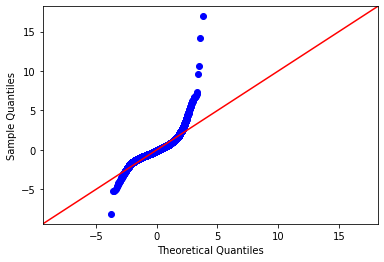

In [62]:
# Checking the Normality Assumption 
import scipy.stats as stats
fig = sm.graphics.qqplot(results3.resid, dist=stats.norm, line='45', fit=True)
# On the higher end, the normality assumption does not seem to hold and looks like there are some skewed data points

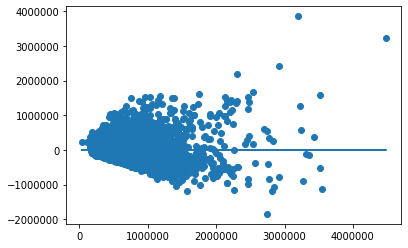

In [63]:
# Checking the homoscedastic assumption
plt.scatter(results3.predict(X_train_const), results3.resid)
plt.plot(results3.predict(X_train_const), [0 for i in range(len(X_train_const))])
plt.show()
# Looks like our assumption is being violated as variance increases as list price increases

## Dropping outliers and applying to refined baseline

(12343, 31)
(12343, 1)
0.8 percentile: 706000.0
0.81 percentile: 720174.6400000001
0.82 percentile: 735000.0
0.83 percentile: 750000.0
0.84 percentile: 762500.0
0.85 percentile: 780000.0
0.86 percentile: 799059.9999999994
0.87 percentile: 815000.0
0.88 percentile: 839996.0000000001
0.89 percentile: 860380.000000001
0.9 percentile: 890000.0
0.91 percentile: 920000.0
0.92 percentile: 952813.6000000006
0.93 percentile: 995060.0000000013
0.94 percentile: 1060000.0
0.95 percentile: 1150000.0
0.96 percentile: 1263199.9999999972
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1965799.999999999


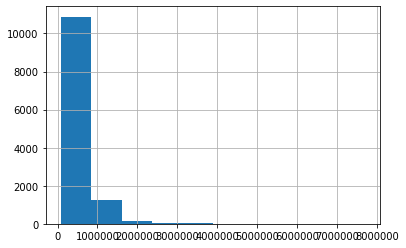

In [64]:
# There were a number of sale prices that were extremely large in our dataset, let's remove those and see how it
# affects our model

# Recalling the original 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X_base,Y_base,test_size=.2, random_state=40)
print(X_train.shape)
print(Y_train.shape)

df_outlier = pd.concat([X_train, Y_train], axis=1)

for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, Y_train.price.quantile(q=q)))

Y_train.price.hist()
plt.show()

In [65]:
# Let's drop everything past the 0.99 percentile
orig_tot = len(df_outlier)
df_outlier_dropped = df_outlier[df_outlier.price < 2000000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_outlier_dropped))/orig_tot)
df_outlier_dropped['price'].max()

X_train = df_outlier_dropped.drop(['price'], axis=1)
Y_train = df_outlier_dropped['price']

Percent removed: 0.009479056955359314


In [66]:
# Now we use our new training data where outliers have been dropped and we try it on our best performing model 
# which is the refined baseline

# Features applied as per final refinements
X_train = X_train[x_cols]
Y_train # as above

20688     530000
19015     482000
20131     345000
7210      292500
17267     339000
          ...   
15729     700000
20257     378000
20041     434900
20329    1390000
16194     287500
Name: price, Length: 12226, dtype: int64

In [67]:
X_train_const = sm.add_constant(X_train)
base_training_model = sm.OLS(Y_train, X_train_const);

In [68]:
results4 = base_training_model.fit()

In [69]:
print(round(results4.rsquared,3))
results4.summary()

0.564


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     985.7
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:42:45   Log-Likelihood:            -1.6589e+05
No. Observations:               12226   AIC:                         3.318e+05
Df Residuals:                   12209   BIC:                         3.319e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            6.1e+04   6219.401      9.808      0.000    4.88e+04    7.32e+04
sqft_above      135.1440      4.013     33.679      0.000     127.278     143.010
sqft_basement   157.1763      4.476     35.119      0.000     148.403     165.949
yr_renovated     65.3555      4.431     14.750      0.000      56.670      74.041
sqft_living15    73.4303      4.130     17.779      0.000      65.335      81.526
sqft_lot15       -0.4777      0.065     -7.364      0.000      -0.605      -0.351
floor_2       -7480.2054   4678.076     -1.599      0.110   -1.66e+04    1689.564
floor_3        1.218e+05   1.07e+04     11.358      0.000    1.01e+05    1.43e+05
wtrfrnt_1      2.074e+05    2.8e+04      7.408      0.000    1.53e+05    2.62e+05
view_1         1.242e+05   1.39e+04      8.966      0.000     9.7e+04    1.51e+05
view_2         9.644e+04   8674.056     11.118      0.000    7.94e+04    1.13e+05
view_3         1.525e+05   1.21e+04     12.594      0.000    1.29e+05    1.76e+05
view_4         2.137e+05   1.87e+04     11.429      0.000    1.77e+05     2.5e+05
grade_10       2.076e+05   8672.221     23.939      0.000    1.91e+05    2.25e+05
grade_11       2.745e+05   1.54e+04     17.847      0.000    2.44e+05    3.05e+05
grade_12       4.281e+05   3.41e+04     12.568      0.000    3.61e+05    4.95e+05
grade_13       6.469e+05    1.9e+05      3.413      0.001    2.75e+05    1.02e+06
==============================================================================
Omnibus:                     2614.413   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8463.095
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.454   Cond. No.                     3.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# Looks like dropping the outliers has not helped our model get any more accurate, in fact it has hindered it 
# significantly, we will stick with the full set.

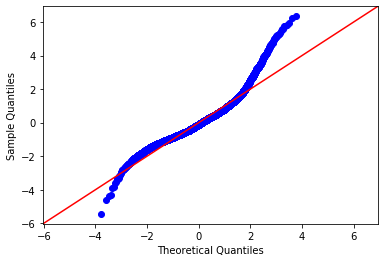

In [71]:
# Normality has however improved and is much closer to a normal distribution
import scipy.stats as stats
fig = sm.graphics.qqplot(results4.resid, dist=stats.norm, line='45', fit=True)

## Time to test our model on our TEST DATA !

In [72]:
# Recalling the original split
# X_train_original
# X_test_original
# Y_train_original
# Y_test_original

In [73]:
# Let's standardize our coefs first so we can compare their impact first when we discuss 

for col in X_train_original:
    X_train_original[col] = (X_train_original[col] - X_train_original[col].mean())/X_train_original[col].std()
X_train_original.head()

/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
20688,0.653355,1.142839,0.217306,-0.234657,0.592625,-0.662882,1.396801,-0.205458,0.664273,-0.277346,...,-0.032469,-0.107877,-0.32435,-0.835450,1.597095,-0.373051,-0.239379,-0.134707,-0.067508,-0.027012
19015,-1.460224,-0.812173,-0.861291,-0.324393,-0.766271,-0.346520,0.987503,-0.205458,-0.823491,-0.418031,...,-0.032469,-0.107877,-0.32435,-0.835450,1.597095,-0.373051,-0.239379,-0.134707,-0.067508,-0.027012
20131,-0.403435,-0.812173,-0.730552,-0.325249,-0.790323,-0.030157,1.260368,-0.205458,-0.954765,-0.419566,...,-0.032469,-0.107877,-0.32435,-0.835450,1.597095,-0.373051,-0.239379,-0.134707,-0.067508,-0.027012
7210,0.653355,0.491168,-0.251175,-0.151219,0.075523,-0.662882,0.782854,-0.205458,-0.006679,-0.214495,...,-0.032469,-0.107877,-0.32435,-0.835450,1.597095,-0.373051,-0.239379,-0.134707,-0.067508,-0.027012
17267,1.710145,0.491168,-0.403704,-0.116653,-0.092836,-0.662882,-0.035741,-0.205458,-0.400499,-0.154091,...,-0.032469,-0.107877,-0.32435,1.196863,-0.626086,-0.373051,-0.239379,-0.134707,-0.067508,-0.027012


In [74]:
X_train = X_train_original[x_cols]
Y_train = Y_train_original

In [75]:
# Retraining model
X_train_const = sm.add_constant(X_train)
base_training_model = sm.OLS(Y_train, X_train_const);

In [76]:
results_final_training = base_training_model.fit()

In [77]:
results_final_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1327.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:42:46   Log-Likelihood:            -1.6964e+05
No. Observations:               12343   AIC:                         3.393e+05
Df Residuals:                   12326   BIC:                         3.394e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.421e+05   2027.923    267.304      0.000    5.38e+05    5.46e+05
sqft_above     1.476e+05   3849.234     38.352      0.000     1.4e+05    1.55e+05
sqft_basement  8.602e+04   2301.558     37.375      0.000    8.15e+04    9.05e+04
yr_renovated   2.728e+04   2049.267     13.311      0.000    2.33e+04    3.13e+04
sqft_living15  3.293e+04   3290.104     10.008      0.000    2.65e+04    3.94e+04
sqft_lot15    -1.924e+04   2091.358     -9.201      0.000   -2.33e+04   -1.51e+04
floor_2       -1.112e+04   2692.492     -4.129      0.000   -1.64e+04   -5838.716
floor_3        1.694e+04   2090.512      8.103      0.000    1.28e+04     2.1e+04
wtrfrnt_1      5.112e+04   2582.922     19.791      0.000    4.61e+04    5.62e+04
view_1         1.833e+04   2050.165      8.940      0.000    1.43e+04    2.23e+04
view_2         2.179e+04   2078.338     10.484      0.000    1.77e+04    2.59e+04
view_3         2.072e+04   2096.755      9.882      0.000    1.66e+04    2.48e+04
view_4         3.158e+04   2628.995     12.011      0.000    2.64e+04    3.67e+04
grade_10       5.281e+04   2296.676     22.993      0.000    4.83e+04    5.73e+04
grade_11        5.29e+04   2268.062     23.326      0.000    4.85e+04    5.74e+04
grade_12       6.505e+04   2155.319     30.182      0.000    6.08e+04    6.93e+04
grade_13        4.84e+04   2071.002     23.371      0.000    4.43e+04    5.25e+04
==============================================================================
Omnibus:                     6518.071   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188416.635
Skew:                           1.973   Prob(JB):                         0.00
Kurtosis:                      21.729   Cond. No.                         3.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Standardising test data 
for col in X_test_original:
    X_test_original[col] = (X_test_original[col] - X_test_original[col].mean())/X_test_original[col].std()
X_test_original.head()

/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
12414,-0.414783,1.481418,1.808111,3.297301,1.611037,0.793176,0.635594,-0.211348,0.621673,0.087519,...,-0.031189,-0.078695,-0.315218,-0.870723,-0.622466,-0.367331,-0.223609,6.763339,-0.057008,-0.025462
1611,0.715977,0.502547,0.523228,-0.294255,0.939907,-0.639504,1.149860,-0.211348,0.841771,-0.285169,...,-0.031189,-0.078695,-0.315218,1.148099,-0.622466,-0.367331,-0.223609,-0.147808,-0.057008,-0.025462
233,-1.545543,-1.455197,-1.150359,-0.143029,-0.951459,-0.639504,-0.358653,-0.211348,-1.212468,0.005788,...,-0.031189,-0.078695,3.171383,-0.870723,-0.622466,-0.367331,-0.223609,-0.147808,-0.057008,-0.025462
18502,-0.414783,-0.476325,-0.912818,-0.217773,-0.683007,-0.639504,-0.255800,-0.211348,-0.933679,-0.215449,...,-0.031189,-0.078695,-0.315218,1.148099,-0.622466,-0.367331,-0.223609,-0.147808,-0.057008,-0.025462
16106,1.846737,1.481418,1.408610,0.054027,0.268777,2.427326,0.361319,-0.211348,3.321530,0.056828,...,-0.031189,-0.078695,-0.315218,-0.870723,-0.622466,-0.367331,4.470651,-0.147808,-0.057008,-0.025462


In [79]:
X_test = X_test_original[x_cols]
Y_test = Y_test_original

In [80]:
# Applying constant to our test data and preparing OLS
X_test_const = sm.add_constant(X_test)
base_training_model = sm.OLS(Y_test, X_test_const);

In [81]:
# Fitting our test model !!
results_final_test = base_training_model.fit()

In [82]:
# Our test model performed well with no overfitting! an R-squared of 0.634!
results_final_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     332.3
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:42:46   Log-Likelihood:                -42468.
No. Observations:                3086   AIC:                         8.497e+04
Df Residuals:                    3069   BIC:                         8.507e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.392e+05   4138.091    130.302      0.000    5.31e+05    5.47e+05
sqft_above     1.314e+05   7668.352     17.133      0.000    1.16e+05    1.46e+05
sqft_basement  8.855e+04   4756.422     18.617      0.000    7.92e+04    9.79e+04
yr_renovated    3.21e+04   4191.354      7.659      0.000    2.39e+04    4.03e+04
sqft_living15  3.306e+04   6693.876      4.938      0.000    1.99e+04    4.62e+04
sqft_lot15    -2.307e+04   4272.581     -5.400      0.000   -3.14e+04   -1.47e+04
floor_2        2832.0116   5361.784      0.528      0.597   -7681.038    1.33e+04
floor_3        1.369e+04   4313.084      3.173      0.002    5228.588    2.21e+04
wtrfrnt_1      3.027e+04   4834.286      6.261      0.000    2.08e+04    3.97e+04
view_1         2.565e+04   4194.109      6.116      0.000    1.74e+04    3.39e+04
view_2         2.122e+04   4240.295      5.004      0.000    1.29e+04    2.95e+04
view_3         2.873e+04   4289.742      6.697      0.000    2.03e+04    3.71e+04
view_4         3.874e+04   5053.529      7.666      0.000    2.88e+04    4.86e+04
grade_10       5.867e+04   4712.776     12.448      0.000    4.94e+04    6.79e+04
grade_11       7.115e+04   4628.920     15.370      0.000    6.21e+04    8.02e+04
grade_12       3.504e+04   4397.958      7.967      0.000    2.64e+04    4.37e+04
grade_13       7.461e+04   4314.845     17.290      0.000    6.61e+04    8.31e+04
==============================================================================
Omnibus:                     1215.712   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14027.303
Skew:                           1.539   Prob(JB):                         0.00
Kurtosis:                      12.981   Cond. No.                         3.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What can we see from the coefficients?

In [83]:
# Basement square footage is our largest coefficient relative to the others and as they are standardised we can
# compare them directly. For every 1 standard deviation increase in square footage, the price will increase by 
# $88,550. 
# Square footage of the lot on the other hand has an approximately 4 times smaller effect and in the opposite 
# direction. For every one standard deviation increase in lot square footage, the price will decrease by $23,070.
# Floor 2 is a categorical variable, if a property has 2 floors, the price will increase by $2,832!